In [103]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# Reconstruir dataset iris

In [104]:
iris = load_iris()
iris.keys()

dt = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
y_iris = iris['target']

In [105]:
# Hacer árbol de clasificación iris con max_depth 2, semilla 800
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf.fit(dt, y_iris)
accuracy_score(y_iris, tree_clf.predict(dt))

0.96

In [106]:
# Hacer PCA con 3 componentes
std = StandardScaler()
dt_std = std.fit_transform(dt)
dt_std = pd.DataFrame(data=dt_std, columns=iris['feature_names'])
dt_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [107]:
pca = PCA(n_components=4)
pca.fit(dt_std)

PCA(n_components=4)

In [108]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [109]:
pca_3 = PCA(n_components=3)
pca_3.fit(dt_std) 

PCA(n_components=3)

In [110]:
pca_3.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [111]:
pca = PCA(n_components=4)
pca.fit(dt_std)

PCA(n_components=4)

In [112]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [113]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [114]:
pca_3 = PCA(n_components=3)
pca_3.fit(dt_std)

PCA(n_components=3)

In [115]:
pca_3.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [116]:
proyecciones = np.dot(pca_3.components_, std.transform(dt).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', "PC2", "PC3"])
proyecciones = proyecciones.transpose()
proyecciones

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [117]:
# Hacer el árbol usando el PCA
tree_clf_3 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_3.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_3.predict(proyecciones))

0.9333333333333333

In [118]:
proyecciones = np.dot(pca_3.components_[:2], std.transform(dt).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', "PC2"])
proyecciones = proyecciones.transpose()
proyecciones

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [119]:
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_2.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_2.predict(proyecciones))

0.9333333333333333

In [120]:
proyecciones.drop(columns=["PC2"], inplace=True, errors="ignore")
proyecciones

,PC1
0,-2.264703
1,-2.080961
2,-2.364229
3,-2.299384
4,-2.389842
...,...
145,1.870503
146,1.564580
147,1.521170
148,1.372788


In [121]:
tree_clf_1 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_1.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_1.predict(proyecciones))

0.9333333333333333

In [122]:
proyecciones = np.dot(pca_3.components_, StandardScaler().fit_transform(dt).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3'])
proyecciones = proyecciones.transpose()
proyecciones

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [123]:
# Hacer el árbol usando el PCA
tree_clf_3 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_3.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_3.predict(proyecciones))

0.9333333333333333

In [124]:
proyecciones = np.dot(pca_3.components_[:2], StandardScaler().fit_transform(dt).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose()
proyecciones

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [125]:
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_2.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_2.predict(proyecciones))

0.9333333333333333

In [126]:
proyecciones.drop(columns=['PC2'], inplace=True, errors='ignore')
proyecciones

,PC1
0,-2.264703
1,-2.080961
2,-2.364229
3,-2.299384
4,-2.389842
...,...
145,1.870503
146,1.564580
147,1.521170
148,1.372788


In [127]:
tree_clf_1 = DecisionTreeClassifier(max_depth=2, random_state=800)
tree_clf_1.fit(proyecciones, y_iris)
accuracy_score(y_iris, tree_clf_1.predict(proyecciones))

0.9333333333333333

In [128]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

(-0.5, 7.5, 7.5, -0.5)

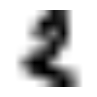

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 2))
plt.imshow(X_digits[2:3].reshape(8, 8), cmap="binary",
               interpolation="bilinear")
plt.axis('off')

In [130]:
std = StandardScaler()
std.fit(X_digits)
X_std = std.transform(X_digits)

In [131]:
pca = PCA(n_components=X_digits.shape[1]) 
pca.fit(X_std)

PCA(n_components=64)

In [132]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

In [133]:
def proyectar(data, pca, n_componentes):
    proyecciones = np.dot(pca[:n_componentes], data.T)
    proyecciones = pd.DataFrame(proyecciones)
    proyecciones = proyecciones.transpose()
    return proyecciones

In [134]:
def recuperar(data, proyecciones, std, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    pca_inversa = pca.inverse_transform(X=proyecciones)
    X_back = std.inverse_transform(pca_inversa)
    
    return X_back

In [135]:
# Mostrar antes y despues con 55 y 25 componentes del PCA

In [136]:
def pinta_pca_digit(X_std, pca, n, pos):
    proyecciones = proyectar(X_std, pca, n)
    X_back = recuperar(X_std, proyecciones, std, n)
    plt.figure(figsize=(2, 4))
    plt.imshow(X_back[pos:pos + 1].reshape(8, 8),
               cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

In [137]:
pinta_pca_digit(X_std, pca, 35, 102)

TypeError: 'PCA' object is not subscriptable